<a href="https://colab.research.google.com/github/saifsame7/Health-Care-predictive-model/blob/main/project_notebook_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Project Workflow

## Project Overview
- **Objective**: Define the problem and goals of the project.
- **Milestones**: Data Collection, Exploration, Preprocessing, Advanced Analysis, Model Development, Deployment, and Final Documentation.

---

# Team Information

## Team Members
- **Name**: saif sameh mohamed  
  **Email**: saif.elsanafery@gmail.com
  
  **Role**: Data Scientist

- **Name**: Nada Mohamed Gamal  
  **Email**: nadagamal.ng33@gmail.com  
  **Role**: data scientist

- **Name**: [Insert Name]  
  **Email**: [Insert Email]  
  **Role**: [Insert Role]

- **Name**: [Insert Name]  
  **Email**: [Insert Email]  
  **Role**: [Insert Role]

- **Name**: [Insert Name]  
  **Email**: [Insert Email]  
  **Role**: [Insert Role]

- **Name**: [Insert Name]  
  **Email**: [Insert Email]  
  **Role**: [Insert Role]

## Additional Information
- **Organization**: egypt digital pioneer intiative
- **Project Timeline**: [02/16/2025 - End Date]  
- **Tools Used**: [pandas,matplotlib]
- **Contact for Inquiries**: [saif.elsanafery@gmail.com]

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Milestone 1: Data Collection, Exploration, and Preprocessing

## Data Collection
- Acquire a dataset from reliable sources (e.g., Kaggle, UCI Repository, or APIs).
- **Scraping Data**:
  - Increase dataset size through web scraping or APIs (e.g., Selenium, BeautifulSoup).
  - Explore public repositories or other accessible sources for additional data.

In [ ]:
# taking what i need from the data (300k)
df=pd.read_csv("E:\AMIT\project data\heart_2020_cleaned2.csv",index_col=False)
df['HeartDisease'].value_counts()
df1=df[df['HeartDisease']=='Yes']
df1.value_counts()


HeartDisease  BMI    Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  DiffWalking  Sex     AgeCategory  Race   Diabetic  PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer
Yes           28.06  Yes      No               No      0               0             No           Male    65-69        White  No        Yes               Very good  8          No      No             No            3
              26.45  Yes      No               No      0               0             No           Male    65-69        White  No        Yes               Good       7          No      No             No            3
              27.81  Yes      No               No      0               0             No           Female  70-74        White  No        Yes               Very good  8          No      No             No            3
              22.24  Yes      No               No      0               0             No           Male    75-79        White  No        Yes      

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
df2=df[df['HeartDisease']=='No']
df2=df2.iloc[:40000]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 0 to 43621
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      40000 non-null  object 
 1   BMI               40000 non-null  float64
 2   Smoking           40000 non-null  object 
 3   AlcoholDrinking   40000 non-null  object 
 4   Stroke            40000 non-null  object 
 5   PhysicalHealth    40000 non-null  int64  
 6   MentalHealth      40000 non-null  int64  
 7   DiffWalking       40000 non-null  object 
 8   Sex               40000 non-null  object 
 9   AgeCategory       40000 non-null  object 
 10  Race              40000 non-null  object 
 11  Diabetic          40000 non-null  object 
 12  PhysicalActivity  40000 non-null  object 
 13  GenHealth         40000 non-null  object 
 14  SleepTime         40000 non-null  int64  
 15  Asthma            40000 non-null  object 
 16  KidneyDisease     40000 non-null  object 
 17

In [ ]:
full_data=pd.concat([df1,df2])
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 67373 entries, 5 to 43621
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      67373 non-null  object 
 1   BMI               67373 non-null  float64
 2   Smoking           67373 non-null  object 
 3   AlcoholDrinking   67373 non-null  object 
 4   Stroke            67373 non-null  object 
 5   PhysicalHealth    67373 non-null  int64  
 6   MentalHealth      67373 non-null  int64  
 7   DiffWalking       67373 non-null  object 
 8   Sex               67373 non-null  object 
 9   AgeCategory       67373 non-null  object 
 10  Race              67373 non-null  object 
 11  Diabetic          67373 non-null  object 
 12  PhysicalActivity  67373 non-null  object 
 13  GenHealth         67373 non-null  object 
 14  SleepTime         67373 non-null  int64  
 15  Asthma            67373 non-null  object 
 16  KidneyDisease     67373 non-null  object 
 17

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
10,Yes,34.30,Yes,No,No,30,0,Yes,Male,60-64,White,Yes,No,Poor,15,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10,0,Yes,Male,75-79,White,Yes,Yes,Poor,4,No,No,Yes
42,Yes,25.06,No,No,No,0,0,Yes,Female,80 or older,White,Yes,No,Good,7,No,No,Yes
43,Yes,30.23,Yes,No,No,6,2,Yes,Female,75-79,White,Yes,Yes,Fair,8,No,Yes,No


In [ ]:
full_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
10,Yes,34.30,Yes,No,No,30,0,Yes,Male,60-64,White,Yes,No,Poor,15,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10,0,Yes,Male,75-79,White,Yes,Yes,Poor,4,No,No,Yes
42,Yes,25.06,No,No,No,0,0,Yes,Female,80 or older,White,Yes,No,Good,7,No,No,Yes
43,Yes,30.23,Yes,No,No,6,2,Yes,Female,75-79,White,Yes,Yes,Fair,8,No,Yes,No


In [ ]:
full_data.to_csv("1111.csv")

## Dataset Description
- Create a table to explain:

 Features Overview
Target Variable:

HeartDisease → (0 = No, 1 = Yes)

Demographics:

Sex → (0 = Female, 1 = Male)

AgeCategory → Age group (Encoded values)

Race → Ethnic background (Encoded values)

Health Metrics:

BMI → Body Mass Index

PhysicalHealth → Number of days with poor physical health in the past 30 days

MentalHealth → Number of days with poor mental health in the past 30 days

SleepTime → Average sleep duration in hours

Medical History:

Stroke → History of stroke (0 = No, 1 = Yes)

Diabetic → Diabetes status (0 = No, 1 = Yes)

Asthma → Asthma diagnosis (0 = No, 1 = Yes)

KidneyDisease → Chronic kidney disease (0 = No, 1 = Yes)

SkinCancer → History of skin cancer (0 = No, 1 = Yes)

Lifestyle Factors:

Smoking → Smoker status (0 = No, 1 = Yes)

AlcoholDrinking → Regular alcohol consumption (0 = No, 1 = Yes)

PhysicalActivity → Engages in physical activity (0 = No, 1 = Yes)

Mobility & General Health:

DiffWalking → Difficulty walking or climbing stairs (0 = No, 1 = Yes)

GenHealth → General health rating (Encoded values from poor to excellent)

## Data Exploration
- Summary statistics (mean, median, variance).
- Identify missing values, duplicates, and outliers.
- Data distribution visualizations: histograms, box plots, scatter plots.

In [ ]:
full_data.info()
full_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 67373 entries, 5 to 43621
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      67373 non-null  object 
 1   BMI               67373 non-null  float64
 2   Smoking           67373 non-null  object 
 3   AlcoholDrinking   67373 non-null  object 
 4   Stroke            67373 non-null  object 
 5   PhysicalHealth    67373 non-null  int64  
 6   MentalHealth      67373 non-null  int64  
 7   DiffWalking       67373 non-null  object 
 8   Sex               67373 non-null  object 
 9   AgeCategory       67373 non-null  object 
 10  Race              67373 non-null  object 
 11  Diabetic          67373 non-null  object 
 12  PhysicalActivity  67373 non-null  object 
 13  GenHealth         67373 non-null  object 
 14  SleepTime         67373 non-null  int64  
 15  Asthma            67373 non-null  object 
 16  KidneyDisease     67373 non-null  object 
 17

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,67373.000000,67373.000000,67373.000000,67373.000000
mean,28.519426,4.975109,4.210797,7.124798
std,6.411306,9.591404,8.400069,1.589251
min,12.210000,0.000000,0.000000,1.000000
25%,24.210000,0.000000,0.000000,6.000000
50%,27.440000,0.000000,0.000000,7.000000
75%,31.660000,4.000000,4.000000,8.000000
max,87.050000,30.000000,30.000000,24.000000


In [ ]:
full_data['HeartDisease'].value_counts()

HeartDisease
No     40000
Yes    27373
Name: count, dtype: int64

In [ ]:
# encoding every yes , no to 1,0
full_data=full_data.replace("No",0)
full_data=full_data.replace("Yes",1)
# encoding the diabetic feature
full_data['Diabetic']=full_data['Diabetic'].replace("No, borderline diabetes",0)
full_data['Diabetic']=full_data['Diabetic'].replace("Yes (during pregnancy)",1)

# encoding the sex
full_data['Sex']=full_data["Sex"].replace("Male",1)
full_data['Sex']=full_data["Sex"].replace("Female",0)

# encoding the races
full_data['Race']=full_data["Race"].replace("White",0)
full_data['Race']=full_data["Race"].replace("Black",1)
full_data['Race']=full_data["Race"].replace("Asian",2)
full_data['Race']=full_data["Race"].replace("American Indian/Alaskan Native",3)
full_data['Race']=full_data["Race"].replace("Hispanic",4)
full_data['Race']=full_data["Race"].replace("Other",5)


full_data.head(20)

C:\Users\basma\AppData\Local\Temp\ipykernel_15532\890228930.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_data=full_data.replace("Yes",1)
C:\Users\basma\AppData\Local\Temp\ipykernel_15532\890228930.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_data['Diabetic']=full_data['Diabetic'].replace("Yes (during pregnancy)",1)
C:\Users\basma\AppData\Local\Temp\ipykernel_15532\890228930.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavi

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6,0,1,0,75-79,1,0,0,Fair,12,0,0,0
10,1,34.30,1,0,0,30,0,1,1,60-64,0,1,0,Poor,15,1,0,0
35,1,32.98,1,0,1,10,0,1,1,75-79,0,1,1,Poor,4,0,0,1
42,1,25.06,0,0,0,0,0,1,0,80 or older,0,1,0,Good,7,0,0,1
43,1,30.23,1,0,0,6,2,1,0,75-79,0,1,1,Fair,8,0,1,0
45,1,20.37,1,0,0,3,0,0,0,70-74,0,0,0,Poor,10,0,0,0
77,1,34.33,0,0,0,0,0,0,0,55-59,0,0,1,Good,8,0,0,0
78,1,28.29,1,0,0,30,30,0,0,70-74,0,1,1,Poor,9,0,1,0
101,1,24.68,1,0,0,30,30,1,1,70-74,0,0,1,Fair,8,0,0,1
127,1,33.65,0,0,0,2,0,1,0,70-74,0,1,0,Fair,4,0,0,0


In [ ]:
# encoding the general health
encoding = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4}
full_data['GenHealth']=full_data['GenHealth'].map(encoding).astype(int)

In [ ]:
# encoding the age categories
age_encoding = {
        '18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,
        '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9,
        '70-74': 10, '75-79': 11, '80 or older': 12
    }
full_data['AgeCategory']=full_data['AgeCategory'].map(age_encoding).astype(int)


In [ ]:
full_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6,0,1,0,11,1,0,0,1,12,0,0,0
10,1,34.30,1,0,0,30,0,1,1,8,0,1,0,0,15,1,0,0
35,1,32.98,1,0,1,10,0,1,1,11,0,1,1,0,4,0,0,1
42,1,25.06,0,0,0,0,0,1,0,12,0,1,0,2,7,0,0,1
43,1,30.23,1,0,0,6,2,1,0,11,0,1,1,1,8,0,1,0


In [ ]:
# droping the duplicates
full_data.duplicated().sum()
full_data=full_data.drop_duplicates()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6490a26e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6490a2c20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6490a2440>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6490a3160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6490a3400>],
 'means': []}

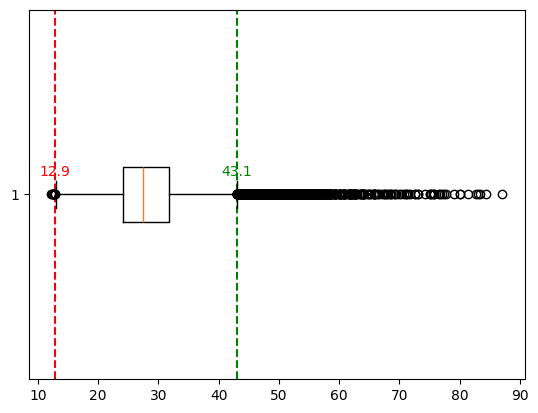

In [ ]:
counter = full_data['BMI'].value_counts()
q1 = np.percentile(full_data['BMI'],25)
q3 = np.percentile(full_data['BMI'],75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Cutoff ({lower_bound:.1f})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Cutoff ({upper_bound:.1f})')
plt.text(lower_bound, 1.05, f'{lower_bound:.1f}', color='red', ha='center')
plt.text(upper_bound, 1.05, f'{upper_bound:.1f}', color='green', ha='center')
plt.boxplot(full_data['BMI'],whis=1.5,vert=False)

In [ ]:
full_data=full_data[(full_data['BMI']>=12.9 ) & (full_data['BMI']<= 43.1)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c64357eaa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c64357f010>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c64357e830>],
 'medians': [<matplotlib.lines.Line2D at 0x1c64357f550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c64357f7f0>],
 'means': []}

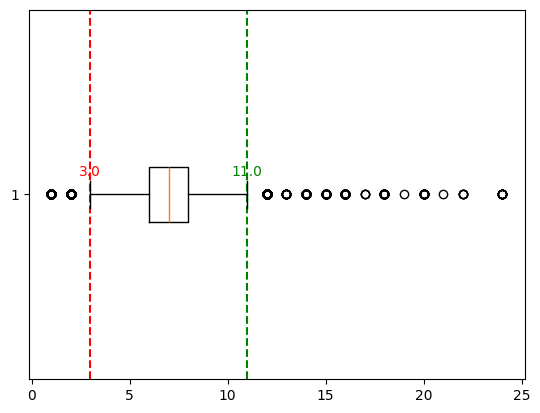

In [ ]:
counter = full_data['SleepTime'].value_counts()
q1 = np.percentile(full_data['SleepTime'],25)
q3 = np.percentile(full_data['SleepTime'],75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower Cutoff ({lower_bound:.1f})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper Cutoff ({upper_bound:.1f})')
plt.text(lower_bound, 1.05, f'{lower_bound:.1f}', color='red', ha='center')
plt.text(upper_bound, 1.05, f'{upper_bound:.1f}', color='green', ha='center')
plt.boxplot(full_data['SleepTime'],whis=1.5,vert=False)

In [ ]:
full_data=full_data[(full_data['SleepTime']>=3 ) & (full_data['SleepTime']<= 11)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c6433f8610>,
 'caps': [<matplotlib.lines.Line2D at 0x1c6433f8b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c6433f8370>],
 'medians': [<matplotlib.lines.Line2D at 0x1c6433f9090>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c6433f9330>],
 'means': []}

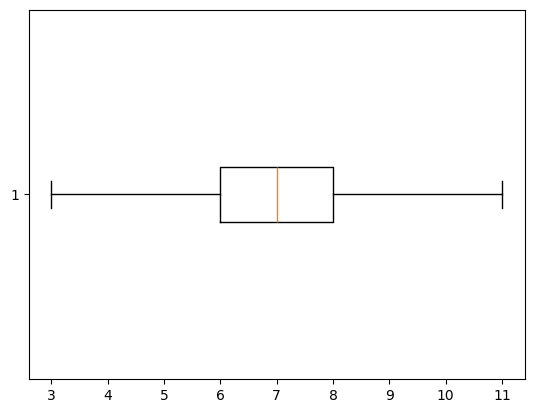

In [ ]:

plt.boxplot(full_data['SleepTime'],whis=1.5,vert=False)

In [ ]:
full_data.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000,63616.000000
mean,0.401267,27.927720,0.476185,0.059325,0.077355,4.729974,4.067436,0.204445,0.518203,7.476075,0.722428,0.191603,0.742769,2.340433,7.067845,0.151330,0.066053,0.131838
std,0.490159,5.346834,0.499436,0.236233,0.267156,9.358193,8.231912,0.403299,0.499672,3.472078,1.471427,0.393565,0.437111,1.124256,1.311664,0.358373,0.248376,0.338317
min,0.000000,12.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,24.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,31.240000,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000,1.000000,10.000000,0.000000,0.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,43.100000,1.000000,1.000000,1.000000,30.000000,30.000000,1.000000,1.000000,12.000000,5.000000,1.000000,1.000000,4.000000,11.000000,1.000000,1.000000,1.000000


In [ ]:
full_data.info()
full_data.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 63616 entries, 35 to 43621
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      63616 non-null  int64  
 1   BMI               63616 non-null  float64
 2   Smoking           63616 non-null  int64  
 3   AlcoholDrinking   63616 non-null  int64  
 4   Stroke            63616 non-null  int64  
 5   PhysicalHealth    63616 non-null  int64  
 6   MentalHealth      63616 non-null  int64  
 7   DiffWalking       63616 non-null  int64  
 8   Sex               63616 non-null  int64  
 9   AgeCategory       63616 non-null  int64  
 10  Race              63616 non-null  int64  
 11  Diabetic          63616 non-null  int64  
 12  PhysicalActivity  63616 non-null  int64  
 13  GenHealth         63616 non-null  int64  
 14  SleepTime         63616 non-null  int64  
 15  Asthma            63616 non-null  int64  
 16  KidneyDisease     63616 non-null  int64  
 1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
35,1,32.98,1,0,1,10,0,1,1,11,0,1,1,0,4,0,0,1
42,1,25.06,0,0,0,0,0,1,0,12,0,1,0,2,7,0,0,1
43,1,30.23,1,0,0,6,2,1,0,11,0,1,1,1,8,0,1,0
45,1,20.37,1,0,0,3,0,0,0,10,0,0,0,0,10,0,0,0
77,1,34.33,0,0,0,0,0,0,0,7,0,0,1,2,8,0,0,0
78,1,28.29,1,0,0,30,30,0,0,10,0,1,1,0,9,0,1,0
101,1,24.68,1,0,0,30,30,1,1,10,0,0,1,1,8,0,0,1
127,1,33.65,0,0,0,2,0,1,0,10,0,1,0,1,4,0,0,0
129,1,25.06,0,0,0,2,0,0,0,8,0,1,1,3,8,0,0,1
131,1,37.59,1,0,0,0,0,0,0,10,0,0,0,0,7,0,0,0


In [ ]:
full_data.to_csv("i_hope_it_work.csv")

# Milestone 2: Advanced Data Analysis and Feature Engineering

## Feature Engineering
- Create derived features based on domain knowledge.
- Apply transformations such as normalization, log scaling, or polynomial features.

In [ ]:
# devide the BMI into some secions
def classify_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"


full_data["BMI"].apply(classify_bmi)



35             None
42       Overweight
43             None
45           Normal
77             None
            ...    
43617    Overweight
43618          None
43619    Overweight
43620          None
43621          None
Name: BMI, Length: 63616, dtype: object

In [ ]:
# over all Health Burden Score
full_data["PhysicalHealth"] + full_data["MentalHealth"]

35       10
42        0
43        8
45        3
77        0
         ..
43617     2
43618     1
43619     0
43620     0
43621     0
Length: 63616, dtype: int64

In [ ]:
def sleep_deviation(sleep_time):
    if sleep_time < 6 :
        return "too little sleep"
    elif sleep_time > 9:
        return "too much sleep"
    else:
        return "good sleep"
full_data["SleepTime"].apply(sleep_deviation)

35       too little sleep
42             good sleep
43             good sleep
45         too much sleep
77             good sleep
               ...       
43617          good sleep
43618          good sleep
43619          good sleep
43620          good sleep
43621          good sleep
Name: SleepTime, Length: 63616, dtype: object

In [ ]:
full_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
35,1,32.98,1,0,1,10,0,1,1,11,0,1,1,0,4,0,0,1
42,1,25.06,0,0,0,0,0,1,0,12,0,1,0,2,7,0,0,1
43,1,30.23,1,0,0,6,2,1,0,11,0,1,1,1,8,0,1,0
45,1,20.37,1,0,0,3,0,0,0,10,0,0,0,0,10,0,0,0
77,1,34.33,0,0,0,0,0,0,0,7,0,0,1,2,8,0,0,0


## Data Visualization
- Generate insightful visualizations:
  - Correlation heatmaps, pair plots.
  - Trends and comparisons using bar charts, line charts, and dashboards.

In [ ]:
import plotly.graph_objects as go


full_data['Sex'] = full_data['Sex'].map({0: 'Female', 1: 'Male'})

heart_disease_rate = full_data.groupby(["Sex"])["HeartDisease"].mean().reset_index()

fig = px.bar(heart_disease_rate,
             x="Sex",
             y="HeartDisease",
             color="Sex",
             title="Heart Disease Rate by Gender",
             labels={"HeartDisease": "Heart Disease Rate", "Sex": "Gender"},
             color_discrete_map={"Female": "#FF9999", "Male": "#66B2FF"},
             text=heart_disease_rate["HeartDisease"].apply(lambda x: f"{x*100:.1f}%"),
             )


fig.update_traces(textposition='auto')
fig.update_layout(
    yaxis_title="Heart Disease Rate (%)",
    xaxis_title="Gender",
    title_x=0.5,
    yaxis_tickformat=".0%",
    showlegend=True,
    bargap=0.2,
    plot_bgcolor="white",
    font=dict(size=14),
)

fig.update_traces(hovertemplate="Gender: %{x}<br>Heart Disease Rate: %{y:.1%}")

fig.show()

In [ ]:
fig = px.histogram(full_data, x='AgeCategory', color='HeartDisease', barmode='overlay',
                   title="Age vs heart disease Disease",
                   labels={'age': 'Age', 'cardio': 'Cardiovascular Disease'})
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(full_data, x='BMI', y='AgeCategory', color='HeartDisease',
                 title="BMI vs Age and Cardiovascular Disease",
                 labels={'BMI': 'Body Mass Index', 'age': 'Age', 'cardio': 'Cardiovascular Disease'},
                 size_max=10, opacity=0.6)
fig.show()

In [ ]:
fig = px.histogram(full_data, x='AlcoholDrinking', color='HeartDisease',
                   title="Impact of Alcohol Drinking on Heart Disease",
                   labels={'AlcoholDrinking': 'Alcohol Drinking', 'count': 'Count'},
                   barmode='group',
                   color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

In [ ]:
fig = px.histogram(full_data, x="Smoking", color="HeartDisease", barmode="group",
                    title="Smoking Rate Among Heart Disease Patients",
                    color_discrete_sequence=["#FF4500", "#32CD32"],
                    labels={"Smoking": "Smoking", "HeartDisease": "Heart Disease"})
fig.show()

In [ ]:
fig = px.bar(np.around(full_data.groupby("PhysicalActivity")["HeartDisease"].mean().reset_index(),2),
              x="PhysicalActivity", y="HeartDisease",
              title="Heart Disease Rate Based on Physical Activity",
              text_auto=True,
              color="PhysicalActivity",
              color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [ ]:
fig = px.strip(full_data, x="GenHealth", y="SleepTime", color="GenHealth",
                title="General Health vs Sleep Time",
                color_discrete_sequence=px.colors.qualitative.Set1,
                labels={"GenHealth": "General Health", "SleepTime": "Sleep Hours"})
fig.show()

In [ ]:
fig = px.histogram(full_data, x="GenHealth", color="HeartDisease", barmode="group",
                    title="General Health Distribution Among Heart Disease Patients",
                    color_discrete_sequence=["#FF33FF", "#33CFFF"],
                    labels={"GenHealth": "General Health", "HeartDisease": "Heart Disease"})
fig.show()

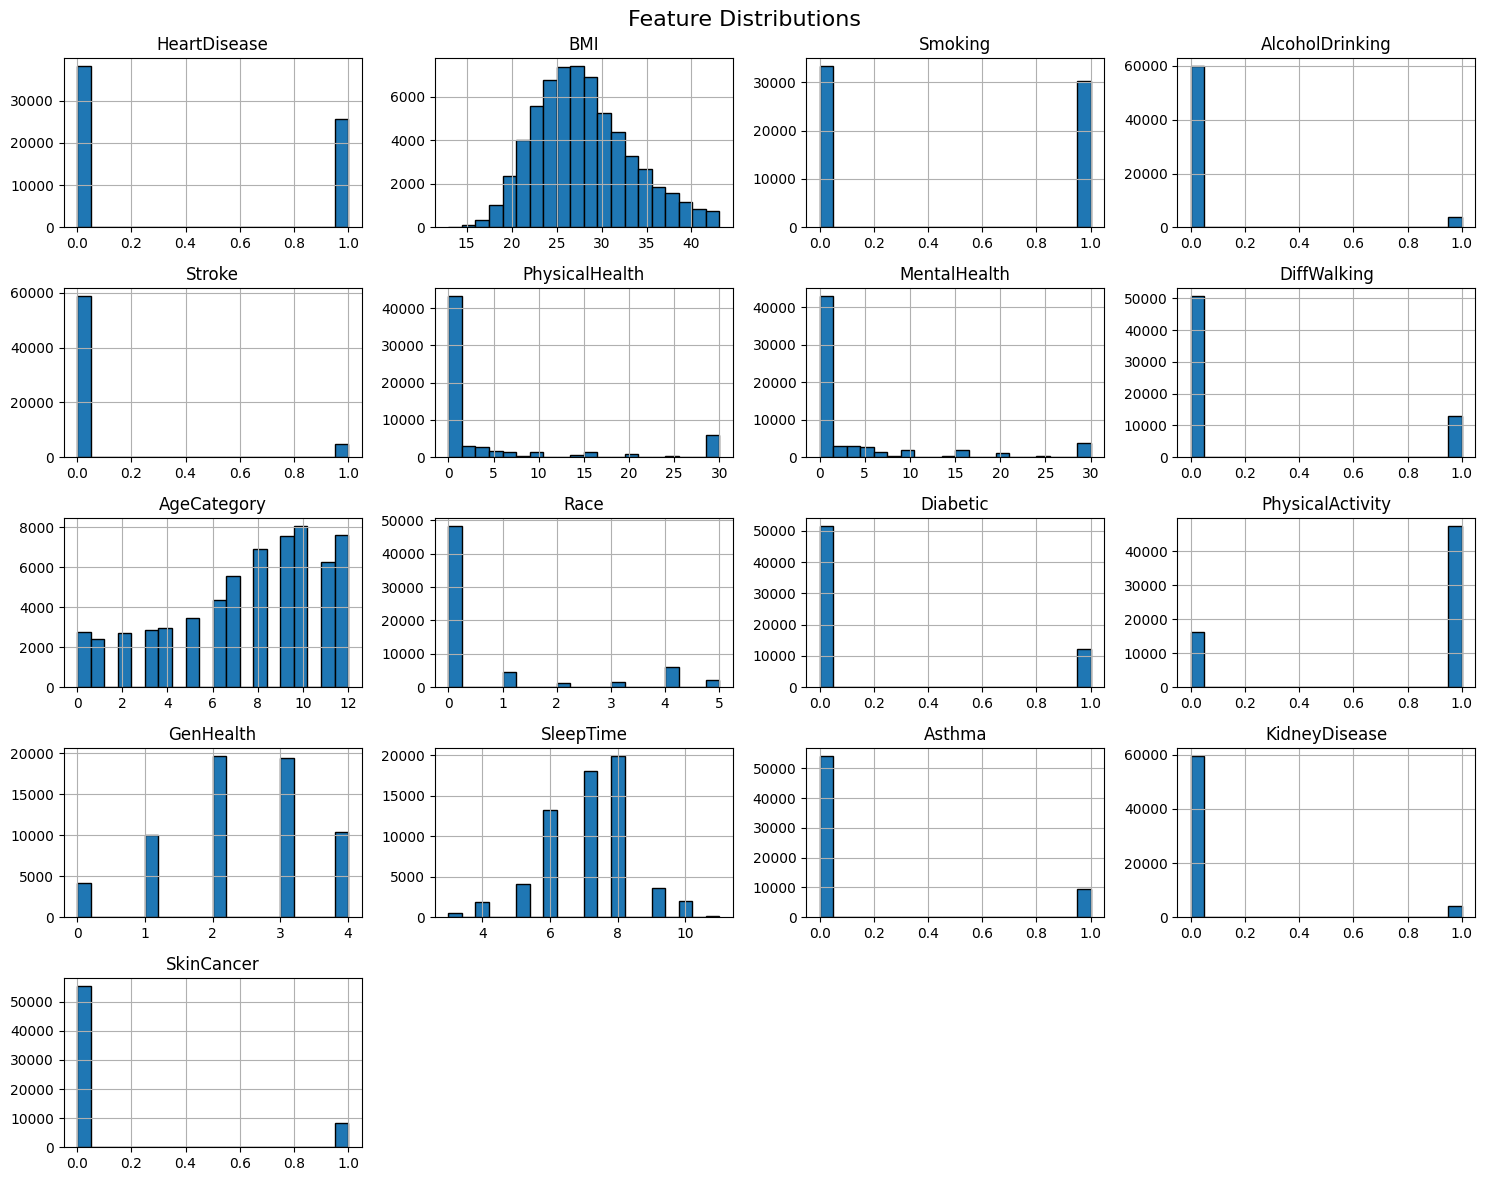

In [ ]:
full_data.hist(figsize=(15, 12), bins=20, color='#1f77b4', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()


---


# Milestone 3: Machine Learning Model Development and Optimization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Model Training
- Split data into training, validation, and testing sets.
- Address imbalances using techniques like SMOTE or stratified sampling.

In [ ]:
df= pd.read_csv("E:\AMIT\Health-Care-predictive-model\i_hope_it_work.csv")
df.tail()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
63611,43617,0,25.11,0,0,0,0,2,0,1,0,0,0,1,3,8,0,0,0
63612,43618,0,34.01,1,0,0,0,1,0,0,4,0,0,1,3,8,1,0,0
63613,43619,0,27.27,0,1,0,0,0,0,1,2,0,0,1,3,7,0,0,0
63614,43620,0,32.26,0,0,0,0,0,0,1,11,1,0,0,2,6,0,0,0
63615,43621,0,36.96,1,0,0,0,0,1,0,6,1,0,0,2,7,0,0,0


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
63611,0,25.11,0,0,0,0,2,0,1,0,0,0,1,3,8,0,0,0
63612,0,34.01,1,0,0,0,1,0,0,4,0,0,1,3,8,1,0,0
63613,0,27.27,0,1,0,0,0,0,1,2,0,0,1,3,7,0,0,0
63614,0,32.26,0,0,0,0,0,0,1,11,1,0,0,2,6,0,0,0
63615,0,36.96,1,0,0,0,0,1,0,6,1,0,0,2,7,0,0,0


In [ ]:
heart_disease_counts = df["HeartDisease"].value_counts()
print(heart_disease_counts)

HeartDisease
0    38089
1    25527
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate data into two groups: Heart Disease (1) and Non-Heart Disease (0)
heart_disease = df[df['HeartDisease'] == 1]
non_heart_disease = df[df['HeartDisease'] == 0]

# Split each group separately (70% train, 30% test)
X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(
    heart_disease.drop(columns=['HeartDisease']), heart_disease['HeartDisease'], test_size=0.3, random_state=42)

X_non_heart_train, X_non_heart_test, y_non_heart_train, y_non_heart_test = train_test_split(
    non_heart_disease.drop(columns=['HeartDisease']), non_heart_disease['HeartDisease'], test_size=0.3, random_state=42)

# Combine the separate train and test sets
X_train = pd.concat([X_heart_train, X_non_heart_train], axis=0)
y_train = pd.concat([y_heart_train, y_non_heart_train], axis=0)

X_test = pd.concat([X_heart_test, X_non_heart_test], axis=0)
y_test = pd.concat([y_heart_test, y_non_heart_test], axis=0)

# Print class distribution after splitting
print("Train set distribution:\n", y_train.value_counts())
print("\nTest set distribution:\n", y_test.value_counts())

# Print shapes
print("\nX_train Shape:", X_train.shape, "y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape, "y_test Shape:", y_test.shape)

Train set distribution:
 HeartDisease
0    26662
1    17868
Name: count, dtype: int64

Test set distribution:
 HeartDisease
0    11427
1     7659
Name: count, dtype: int64

X_train Shape: (44530, 17) y_train Shape: (44530,)
X_test Shape: (19086, 17) y_test Shape: (19086,)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("After SMOTE:")
print(y_train_smote.value_counts())

After SMOTE:
HeartDisease
1    26662
0    26662
Name: count, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_smote, y_train_smote)

y_pred = xgb.predict(X_test)



e:\tools\envs\depi_env\lib\site-packages\xgboost\training.py:183: UserWarning:

[23:05:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




## Model Evaluation
- Metrics to consider: Accuracy, Precision, Recall, F1-score, RMSE, etc.
- Visual tools: Confusion matrices, ROC curves.

Accuracy: 0.7533794404275385
              precision    recall  f1-score   support

           0       0.83      0.74      0.78     11427
           1       0.67      0.77      0.72      7659

    accuracy                           0.75     19086
   macro avg       0.75      0.76      0.75     19086
weighted avg       0.76      0.75      0.76     19086



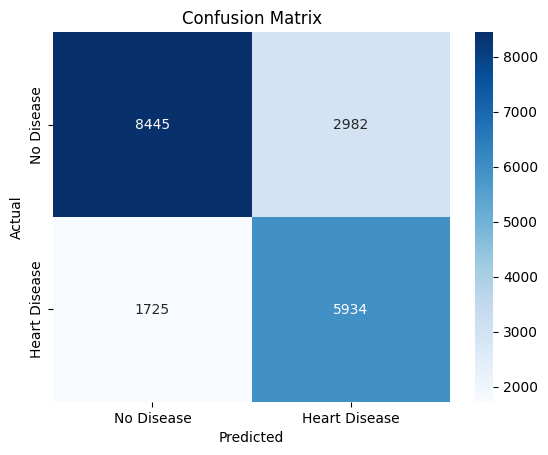

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Heart Disease'],
            yticklabels=['No Disease', 'Heart Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Model Comparison
- Compare multiple models and justify the final model selection.


---


# Milestone 4: Deployment and Monitoring

## Deployment
- Deploy the model as a REST API (Flask, FastAPI) or interactive dashboards (Streamlit, Dash).
- Host on cloud platforms (AWS, Azure, GCP) or local servers.

## Monitoring
- Set up performance tracking and alert systems for issues.
- Monitor metrics for potential model drift or anomalies.

## Retraining Strategy
- Plan for periodic retraining with new or updated data.


---


# Milestone 5: Final Documentation and Presentation

## Final Report
- Summarize all project phases, including methodologies and insights.
- Provide actionable recommendations based on findings.

## Final Presentation
- Create a presentation for stakeholders, highlighting key results.
- Include a demo of the deployed application or model.

## Future Improvements
- Suggest areas for enhancement:
  - Incorporating more diverse data.
  - Experimenting with additional algorithms.
  - Optimizing deployment for scalability.

---

# Additional Sections

## Challenges Faced
- Document key challenges encountered during the project lifecycle.

## Lessons Learned
- Reflect on insights and skills gained through the project.

## References
- List resources for datasets, tools, and techniques utilized.

---

# More Sections for Specific Projects

## Ethical Considerations
- Discuss privacy, fairness, or other ethical implications.

## Business Impact
- Highlight how the findings address the original objective.

## Team Contributions
- Acknowledge contributions from team members and collaborators.


---
